# Neuroimaging data

## Python libraries `nibabel` and `nilearn`
<img align="right" src="https://nipy.org/nibabel/_static/nibabel-logo.svg" width="20%">

**Nibabel** is a low-level Python library that gives access to a variety of imaging formats, with a particular focus on providing a common interface to the various **volumetric** formats produced by scanners and used in common neuroimaging toolkits.

 - NIfTI-1
 - NIfTI-2
 - SPM Analyze
 - FreeSurfer .mgh/.mgz files
 - Philips PAR/REC
 - Siemens ECAT
 - DICOM (limited support)

It also supports **surface** file formats

 - GIFTI
 - FreeSurfer surfaces, labels and annotations

**Connectivity**

 - CIFTI-2

**Tractography**

 - TrackViz .trk files

And a number of related formats.

**Note:** Almost all of these can be loaded through the `nibabel.load` interface.

## Reading NIfTI files
.nii - Neuroimaging Informatics Technology Initiative

In [12]:
import nibabel as nib

First, use the `load()` function to create a `NiBabel` image object from a NIfTI file. We’ll load in an example `T1w` image.

In [13]:
t1_img = nib.load('sub-01_T1w.nii.gz')

Loading in a NIfTI file with `NiBabel` gives us a special type of data object which encodes all the information in the file. Each bit of information is called an attribute in Python’s terminology. To see all of these attributes, type `t1_img.` followed by pressing `Tab`. There are three main attributes that we’ll discuss today:
* `Header`
* `Data`
* `Affine`

### Header
`Header` contains metadata about the image, such as image dimensions, data type, etc.

In [14]:
t1_hdr = t1_img.header
print(t1_hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 160 192 192   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        0.9999999 1.3333334 1.3333334 2.3       1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer May 13 2013'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : -0.0043632984
quatern_d       : 0.0
qoffset_x       : -84.77323
qoffset_y 

`t1_hdr` is a Python **dictionary**. Dictionaries are containers that hold pairs of objects - **keys** and **values**. Let’s take a look at all of the keys. Similar to `t1_img` in which attributes can be accessed by typing `t1_img.` followed by `Tab`, you can do the same with `t1_hdr`. In particular, we’ll be using a **method** belonging to `t1_hdr` that will allow you to view the keys associated with it.

In [15]:
t1_hdr.keys()

['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

Notice that **methods** require you to include `()` at the end of them whereas attributes do not. The key difference between a method and an attribute is:
* Attributes are stored *values* kept within an object
* Methods are *processes* that we can run using the object. Usually a method takes attributes, performs an operation on them, then returns it for you to use.

The output above is a list of **keys** you can use from `t1_hdr` to access values. We can access the value stored by a given key by typing: `t1_hdr['<key_name>']`

#### Exercise 1

 Extract `pixdim` value from the `t1_hdr`.

In [16]:
# Work on your solution here

### Data
As you’ve seen above, the header contains useful information that gives us information about the properties (metadata) associated with the MR data we’ve loaded in. Now we’ll move in to loading the actual image data itself. We can achieve this by using the method called `t1_img.get_fdata()`.

In [18]:
t1_data = t1_img.get_fdata()
t1_data

array([[[ 9., 26., 11., ..., 10.,  5.,  0.],
        [ 4., 10., 13., ...,  7.,  5.,  0.],
        [ 5.,  8., 12., ...,  5., 10.,  0.],
        ...,
        [11.,  5.,  8., ...,  5.,  8.,  0.],
        [12.,  4.,  4., ...,  9., 13.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[13.,  7., 10., ..., 11.,  7.,  0.],
        [18., 18.,  1., ...,  5., 24.,  0.],
        [15.,  7.,  2., ...,  4., 16.,  0.],
        ...,
        [ 6., 18.,  9., ...,  5., 10.,  0.],
        [ 8.,  8.,  8., ..., 14., 10.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 5.,  8.,  9., ...,  5., 14.,  0.],
        [13.,  9.,  9., ...,  1., 30.,  0.],
        [26.,  5., 12., ..., 13., 12.,  0.],
        ...,
        [13., 21., 13., ...,  4.,  7.,  0.],
        [ 4., 11., 21., ..., 10., 10.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 9.,  4., 10., ...,  8.,  9.,  0.],
        [14.,  9.,  3., ...,  3., 18.,  0.],
        [ 4., 12.,  5., ...,  2., 12.,  0.

What type of data is this exactly? We can determine this by calling the `type()` function on `t1_data`.

In [19]:
type(t1_data)

numpy.ndarray

The data is a **multidimensional array** representing the image data. In Python, an array is used to store lists of numerical data into something like a table.

How can we see the number of dimensions in the `t1_data` array? Once again, all of the attributes of the array can be seen by typing `t1_data.` followed by `Tab`.

In [20]:
# number of dimensions
t1_data.ndim

3

In [21]:
# how big each dimension is
t1_data.shape

(160, 192, 192)

The 3 numbers given here represent the number of values along a respective dimension *(x,y,z)*. This brain was scanned in 160 slices with a resolution of 192 x 192 voxels per slice. That means there are:

`160 * 192 * 192 = 5898240`

voxels in total!

Let’s see the type of data inside of the array.

In [22]:
t1_data.dtype

dtype('float64')

This tells us that each element in the array (or voxel) is a floating-point number.
The data type of an image controls the range of possible intensities. As the number of possible values increases, the amount of space the image takes up in memory also increases. 

Let's see what the range of this image is. 

In [23]:
import numpy as np
print(np.min(t1_data))
print(np.max(t1_data))

0.0
962.0


For our data, the range of intensity values goes from `0` (black) to more positive digits (whiter), up to `962`.

How do we examine **what value a particular voxel is**? We can inspect the value of a voxel by selecting an index as follows:

`data[x,y,z]`

So for example we can inspect a voxel at coordinates `(10,20,3)` by doing the following:

In [24]:
t1_data[9, 19, 2]

9.0

We can also extrect data from a **slice** (or an array) of voxels for visualisation and analysis. 
**Slicing** does exactly what it seems to imply. Giving our 3D volume, we pull out a 2D slice of our data. Below is an example of slicing from left to right (sagittal slicing, along the `x-axis`). We look at the '10th' slice.

**NOTE**: Python uses **zero-based indexing**. The first item in the array is item `0`. The second item is item `1`, the third is item `2`, etc.

In [27]:
x_slice = t1_data[9, :, :]
print(x_slice)

[[ 9. 21. 15. ... 10. 10.  0.]
 [ 8.  2.  0. ...  5.  7.  0.]
 [ 7.  7.  9. ...  7.  3.  0.]
 ...
 [ 3.  5.  4. ... 17. 15.  0.]
 [ 3.  6. 18. ... 12. 20.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


This is similar to the indexing we did before to pull out a single voxel. However, instead of providing a value for each axis, the `:` indicates that we want to grab all values from that particular axis.

#### Excercise 2

Now try selecting the `20th` slice from the `y axis`.

In [ ]:
# Work on your solution here

Now try grabbing the `3rd slice` from the `z axis`.

In [ ]:
# Work on your solution here

We’ve been slicing and dicing brain images but we have no idea what they look like! Let's look how how the `100` slice of each of the `3` dimensions look. 

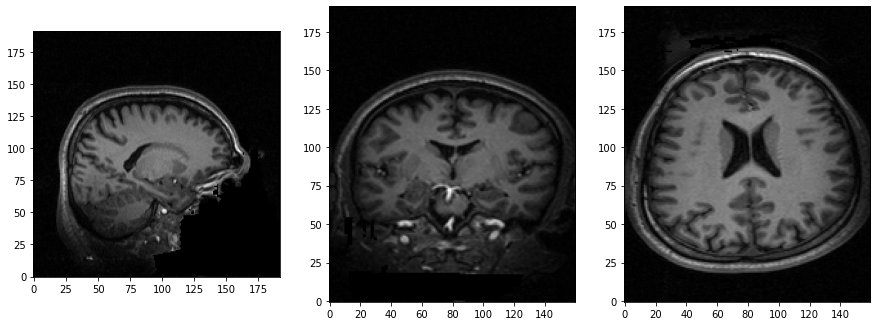

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

slices = [t1_data[99, :, :], t1_data[:, 99, :], t1_data[:, :, 99]]

fig, axes = plt.subplots(1, len(slices), figsize=(15,15))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")


`Nibabel` has its own viewer, which can be accessed through `img.orthoview()`.

**Sidenote to plotting with orthoview()**

As with other figures, if you initiated `matplotlib` with `%matplotlib inline`, the output figure will be static. If you use `orthoview()` in a normal IPython console, it will create an interactive window, and you can click to select different slices, similar to `mricron`. To get a similar experience in a `jupyter notebook`, use `%matplotlib notebook`. **But don't forget to close figures afterward again or use` %matplotlib inline` again, otherwise, you cannot plot any other figures.**

<IPython.core.display.Javascript object>


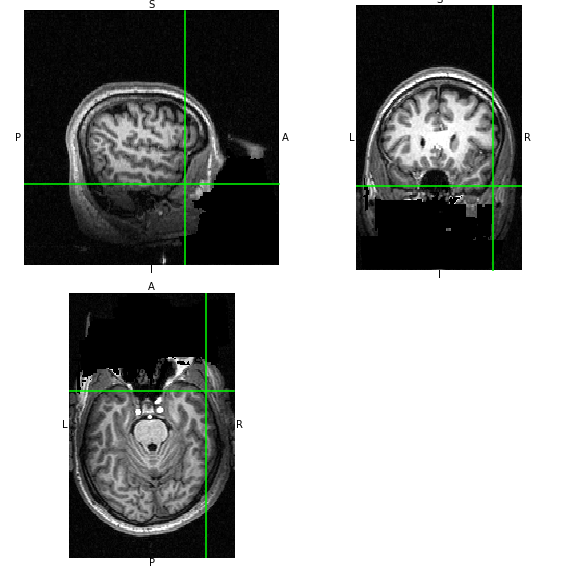

<OrthoSlicer3D: sub-01_T1w.nii.gz (160, 192, 192)>

In [38]:
%matplotlib notebook
t1_img.orthoview()

## Affine
The final important piece of metadata associated with an image file is the **affine matrix**. `Affine` tells the position of the image array data in a reference space. Below is the affine matrix for our data. That is, relating the **voxel coordinates** to **world coordinates** in **RAS** (right, anterior, superior) space. 

In [35]:
t1_affine = t1_img.affine
print(t1_affine)

[[ 9.99961793e-01  0.00000000e+00 -1.16353519e-02 -8.47732315e+01]
 [ 0.00000000e+00  1.33333337e+00  0.00000000e+00 -1.40180023e+02]
 [ 8.72651301e-03  0.00000000e+00  1.33328259e+00 -1.44202881e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


To explain this concept, recall that we referred to coordinates in our data as (x,y,z) coordinates such that:
* x is the first dimension of `t1_data`
* y is the second dimension of `t1_data`
* z is the third dimension of `t1_data`

Although this tells us how to access our data in terms of voxels in a 3D volume, it doesn’t tell us much about the actual dimensions in our data (centimetres, right or left, up or down, back or front). The affine matrix allows us to translate between **voxel coordinates** in `(x,y,z)` and **world space coordinates** in (`left/right,bottom/top,back/front`). An important thing to note is that in reality in which order you have:
* left/right
* bottom/top
* back/front

Depends on how you’ve constructed the affine matrix, but for the data we’re dealing with it always refers to:
* Right
* Anterior
* Superior
